# 有限母集団・非復元抽出（超幾何）のまとめノート

このノートは、**有限母集団から非復元で抽出する場面**の要点を、表とグラフで整理するためのメモです。
数式は最小限にして、言葉と可視化で形が思い出せるようにします。

- 例の設定：母集団 N=10、成功（関東）M=5、抽出 n=5
- 成功数 K は超幾何分布（hypergeometric）
- 比率は K/n で読む


## 1. まずは設定の表で固定

数の意味がぶれると、非復元の -1 が混線しやすくなるので、先に表で固定します。


In [1]:
import pandas as pd

summary = pd.DataFrame(
    [
        ["母集団の大きさ", "N", 10],
        ["成功（関東）の数", "M", 5],
        ["抽出数", "n", 5],
        ["成功数の確率変数", "K", "0〜n の整数"],
    ],
    columns=["項目", "記号", "値"],
)
summary

,項目,記号,値
0,母集団の大きさ,N,10
1,成功（関東）の数,M,5
2,抽出数,n,5
3,成功数の確率変数,K,0〜n の整数


## 2. 超幾何の確率（表）

K の取りうる値と確率を表にします。
ここが見えると、分散や共分散の話も「どの確率を足しているか」が掴みやすくなります。


In [2]:
from math import comb

N = 10
M = 5
n = 5

def hypergeom_pmf(k, N, M, n):
    if k < 0 or k > n:
        return 0.0
    if k > M or n - k > N - M:
        return 0.0
    return comb(M, k) * comb(N - M, n - k) / comb(N, n)

ks = list(range(0, n + 1))
pmf = [hypergeom_pmf(k, N, M, n) for k in ks]

pmf_table = pd.DataFrame({
    "K（成功数）": ks,
    "P(K=k)": pmf,
})
pmf_table

,K（成功数）,P(K=k)
0,0,0.003968
1,1,0.099206
2,2,0.396825
3,3,0.396825
4,4,0.099206
5,5,0.003968


## 3. グラフで見る（分布の形）

表の確率を棒グラフにすると、
**中央に山がある（平均付近が最も起こりやすい）**ことが直感的に見えます。


/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_546822/2660219162.py:9: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRA

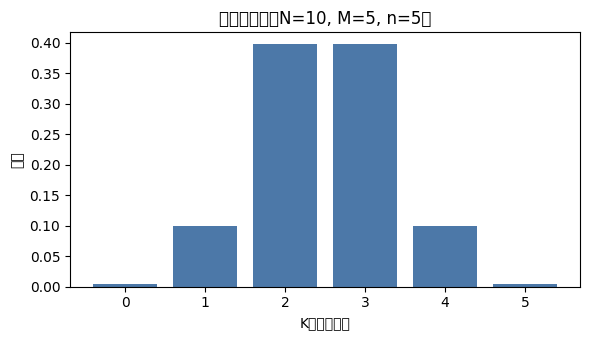

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3.5))
plt.bar(ks, pmf, color="#4C78A8")
plt.title("超幾何分布（N=10, M=5, n=5）")
plt.xlabel("K（成功数）")
plt.ylabel("確率")
plt.xticks(ks)
plt.tight_layout()
plt.show()

## 4. 平均と分散（比較表）

非復元（超幾何）と復元（独立抽出）の違いを表で並べます。
**分散が小さくなる**ことが見えると、非復元の直感が固まります。


In [4]:
p = M / N

mean_hg = n * p
var_hg = n * p * (1 - p) * (N - n) / (N - 1)

mean_binom = n * p
var_binom = n * p * (1 - p)

compare = pd.DataFrame(
    [
        ["非復元（超幾何）", mean_hg, var_hg],
        ["復元（独立）", mean_binom, var_binom],
    ],
    columns=["抽出方法", "E[K]", "Var(K)"],
)
compare

,抽出方法,E[K],Var(K)
0,非復元（超幾何）,2.5,0.694444
1,復元（独立）,2.5,1.250000


## 5. まとめ（焼き付け用の最短メモ）

- **無作為**：位置（抽出番号）は同格 → 同じ値が並ぶ → 個数×代表値
- **非復元**：戻さないので独立が崩れる → 共分散が残る → 分散が小さくなる
- **超幾何**：成功数 K を置いて、K の平均・分散を使うと最短

使い分けの目安：
- **K（成功数）や比率が主役**なら超幾何ルートが速い
- **ペアの確率（同時成功）や共分散**が主役なら指示変数ルートが安心
